<a href="https://colab.research.google.com/github/ajheller/notebooks/blob/master/Copy_of_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Due the day/time of the final.

Interactive grading will be June 8th through 15th (by either aron or Michael.)



Submit answers in a copy of this notebook.

# 1. 

Ch. 7 Polynomial Transform LM question:

Plot the polynomial fit on the Pima dataset (included in HW2 folder) for degree 1 through 7 against the scatter plot of the data. Also note the change in the proportion of explained variance due to X, analyze (eg. bias/variance), and choose the appropriate degree fit.


In [0]:
# import drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# pima.csv is from https://www.kaggle.com/uciml/pima-indians-diabetes-database
# last column is "Outcome", which I assume is the y, other cols are X
# Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

import pandas as pd
import numpy as np
### INSERT YOUR PATH to data HERE: ###
my_path = '/content/drive/My Drive/ecs171_yancey/Homework/Homework2_Ch7,9,NN/pima.csv'
pima = pd.read_csv(my_path, header=None)  # there is no header line in this file
pima

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [0]:
# split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = \
  train_test_split(pima.iloc[:, 0:8],
                   pd.DataFrame(pima.iloc[:,8]), 
                   test_size=100)

In [0]:
# fit a kNN model for comparison
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train )

# get kNN predictions
knnpreds = knn.predict(X_test)


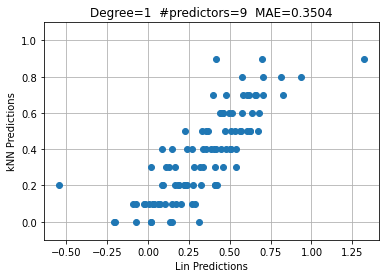

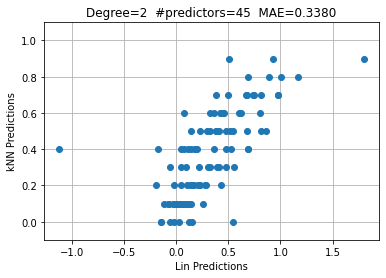

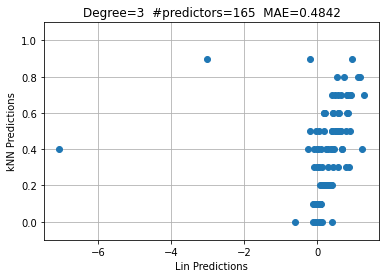

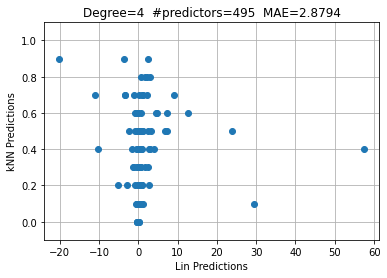

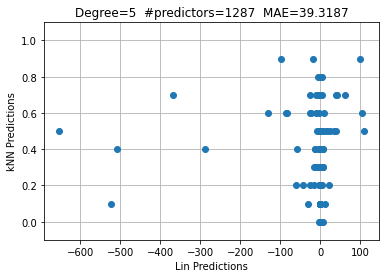

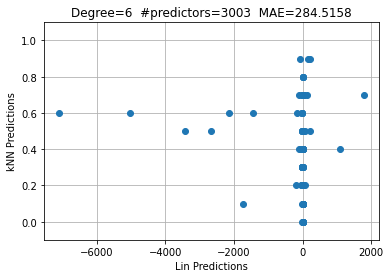

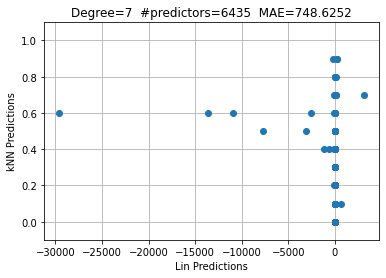

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

for degree in range(1,8):
  poly_reg = PolynomialFeatures(degree=degree)
  X_poly = poly_reg.fit_transform(X_train.values)
  pol_reg = LinearRegression()
  pol_reg.fit(X_poly, y_train.values)

  preds = pol_reg.predict(poly_reg.fit_transform(pd.DataFrame(X_test.values)))
  # print(degree, mean_absolute_error(y_test.values,preds))
  # print('number of predictors', pol_reg.coef_.shape[1])

  # make the scatter plot of kNN vs Lin for this degree
  plt.plot(preds, knnpreds, 'o')
  plt.title("Degree=%d  #predictors=%d  MAE=%0.4f" % 
            (degree, pol_reg.coef_.shape[1], 
             mean_absolute_error(y_test.values,preds)))
  plt.xlabel('Lin Predictions')  # autoscale
  plt.ylabel('kNN Predictions'); plt.ylim(-0.1, 1.1)
  plt.grid(True)
  plt.show()

Answer: Depeding on the split, lowest mean absolute error is with degree 1 or 2. Higher degrees produce huge errors at some points.

# 2.

Ch. 7 GLM Question:

Demonstrate how both the **OVA** and **AVA** methods work by predicting the class with the highest probability evaluating each of the indivisual cases with binary class logistic regression on the Vertebrae data (eg. predicting class DH, SL, or NO). Verify using sklearn for automatic multi-class logistic regression.

In [0]:
# import drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
my_path = '/content/drive/My Drive/ecs171_yancey/Lecture_Notes/Chapter_2/column_3C.dat'
# load CSV using pandas library, no header on this data!
vert = pd.read_csv(my_path, sep=' ', header=None)
vert

,0,1,2,3,4,5,6
0,63.03,22.55,39.61,40.48,98.67,-0.25,DH
1,39.06,10.06,25.02,29.00,114.41,4.56,DH
2,68.83,22.22,50.09,46.61,105.99,-3.53,DH
3,69.30,24.65,44.31,44.64,101.87,11.21,DH
4,49.71,9.65,28.32,40.06,108.17,7.92,DH
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [0]:
# turn column 6 into dummies
vd = pd.get_dummies(vert, columns=[6,])
# drop any NaNs
vd = vd.dropna()
vd

,0,1,2,3,4,5,6_DH,6_NO,6_SL
0,63.03,22.55,39.61,40.48,98.67,-0.25,1,0,0
1,39.06,10.06,25.02,29.00,114.41,4.56,1,0,0
2,68.83,22.22,50.09,46.61,105.99,-3.53,1,0,0
3,69.30,24.65,44.31,44.64,101.87,11.21,1,0,0
4,49.71,9.65,28.32,40.06,108.17,7.92,1,0,0
...,...,...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0,1,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0,1,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0,1,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0,1,0


In [0]:
# get rid of warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [0]:
# OVA -- train three GLM models, one for each class, pick highest prob

# split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = \
  train_test_split(vd.iloc[:,:6], 
                   pd.DataFrame(vd.iloc[:,6:]), 
                   test_size=30)

import statsmodels.api as sm
models = []
ypreds = []
for c in range(3):
  model = sm.GLM(pd.DataFrame(y_train.iloc[:, c]).values.ravel(), X_train, 
                 family=sm.families.Binomial()).fit()
  ypred = model.predict(X_test)
  models.append(model)
  ypreds.append(ypred)

# make an nx3 frame of the probabilities of each class
ypreds = pd.concat(ypreds, axis=1)

# pick the largest one in each row
ypreds_class = np.argmax(ypreds.values, axis=1)
y_test_class = np.argmax(y_test.values, axis=1)

# where do they agree?
print(y_test_class == ypreds_class)

# what's the error
from sklearn.metrics import accuracy_score
accuracy_score(y_test_class, ypreds_class)


[ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]


0.9333333333333333

In [0]:
# AVA -- train three GLM models DH vs NO, DH vs SL, NO vs SL, choose class that wins most often
#  use same split at OVA
import statsmodels.api as sm
import itertools as it
ypreds=[]
combos = []
for a, b in it.combinations(("6_DH", "6_NO", "6_SL"), 2):
  combos.append([a,b])
  # pick out columns a and b 
  Xtr = X_train[(y_train[a]==1) | (y_train[b]==1)]
  # take column b, 0 -> in a, 1 -> in b
  ytr = y_train[(y_train[a]==1) | (y_train[b]==1)][b]
  model = sm.GLM(ytr, Xtr, family=sm.families.Binomial()).fit()
  ypred = model.predict(X_test) > 0.5
  ypreds.append(ypred)
ypreds = pd.concat(ypreds, axis=1)
#ypreds
combos

[['6_DH', '6_NO'], ['6_DH', '6_SL'], ['6_NO', '6_SL']]

In [0]:
# build a look up table (by hand) to tally the votes (TODO automate this!)
d = [[[0 for i in range(2)] for j in range(2)] for k in range(2)]
d[0][0][0] = 0   # DH
d[0][0][1] = 0   # DH
d[0][1][0] = -1  # tie
d[0][1][1] = 2   # SL
d[1][0][0] = 1   # NO
d[1][0][1] = -1  # tie
d[1][1][0] = 1   # NO
d[1][1][1] = 2   # SL

# tally
y_class = np.array([d[p[0]][p[1]][p[2]] for p in ypreds.values])
print(y_class==y_test_class)
accuracy_score(y_test_class, y_class)

[ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]


0.9333333333333333

In [0]:
# Now try with the sklearn versions

# 6 is the outcome, convert strings to numeric for multiclass prediction
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
vert.iloc[:,6] = le.fit_transform(vert.iloc[:,6])
vert[6] = vert[6].astype('category')


In [0]:
Y = vert.iloc[:,6]
print(Y.unique().tolist())

[0, 2, 1]


In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# duplicate the split from earlier
#  X is the same, but y is encoded labels, not dummies as before
y_train1 = pd.DataFrame(vert.loc[X_train.index,6])
y_test1 = pd.DataFrame(vert.loc[X_test.index,6])

for method in ('ovr', 'auto', 'multinomial'):
  model = LogisticRegression(multi_class=method, max_iter=1000)
  model.fit(X_train, y_train1.values.ravel())
  y_pred = model.predict(X_test)
  print(method, accuracy_score(y_pred, y_test1))

# this looks handy: https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html

ovr 0.9666666666666667
auto 0.9666666666666667
multinomial 0.9666666666666667


Examinging the results from multiple splits, I get close results comparing sm.GLM to sklearn.LogisticRegression with various multiclass methods.

# 3. 

Ch.9 SVM Question 1: 

**Kernel Trick:** Write a mathematical derivation and explanation on the purpose of the Kernel Trick in SVM. Please, include **Mercer's Theorem**, the **mapping** and **Kernel functions**, and **support vector**s in your formulation. (Make sure you understand it for interactive grading!) See the textbook if you forgot the dot product math. And, note that more math on SVM has been added to the textbook.

In an SVM, the loss function is written in terms of the dot product of the data points and the support vectors. The idea behind using kernel functions in SVMs is that it allows us to transform data into a higher dimentionsional space where the data is linearly separable by an LPH. 

The obvious way to do this is to transform all the points into into the higher dimensional space, find the support vectors and then compute the dot products between points and support vectors, to both fit and predict. The problem is that these transformed, high-dimentions points can be very large and need more memory that we have on a machine.  

If the kernel function has the properties specified in Mercer's theorem, we can find a new function that defines the dot product in the transformed space from the orginal points directly, without ever transforming the points themselves, thus allowing much larger problems to be worked in a given amount of memory.

Because we are working with discrete data, the kernel function can be written as a matrix.  Mercer's theorem says that the matrix must be "self-adjoint" which means that it is equal the conjugate transpose of itself. In our case, the matrix coefficents are real, so that reduces to simply the transpose. 

[TBD... the properties specified by Mercer's theorem and math goes here]

# 4. 

Ch.9 SVM Question 2: 

a. Import the breast cancer data as below (used to detect if cancer is malignant/0 or benign/1.) Write a function to determine the optimal (highest accuracy on test set)  degree and/or cost for rbf or polynomial kernels.  (You choose the inputs you think are appropriate.)

b. Plot at least 2 of the the support vectors (2-3 features per plot) for each kernel. 


c. Does changing the size of the test set change the optimal parameters? Why or why not? Does changing the parameters change the runtime? Why or why not?



In [78]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt

cancer = datasets.load_breast_cancer()  # loads a dict
print('keys:', cancer.keys())
print('\nfeature_names:\n', cancer['feature_names'])
print('\ntarget_names:', cancer['target_names'])
X = pd.DataFrame(cancer.data, columns=cancer['feature_names'])

mean_ind = range(0, 10)
error_ind = range(10, 20)
worst_ind = range(20, 30)

# after remapping, malignant = -1, benign = 1
y = pd.DataFrame(cancer.target*2-1, columns=cancer['target_names'][1:]) # transform to -1/+1
#y = pd.DataFrame(cancer.target, columns=cancer['target_names'][1:]) # transform to -1/+1
# malignant = red, benign = blue
colors = ['red' if yy < 0 else 'blue' for yy in y.values.ravel()]

X_benign = X[y['benign']>0.5]
X_malignant = X[y['benign']<0.5]

# check for NaN and Nulls
#X.isnull().sum() = 0
#X.isna().sum() = 0

keys: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

feature_names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

target_names: ['malignant' 'benign']


In [76]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

model = Ridge(alpha=1e-2).fit(X_train, y_train)
print("r2 = ", model.score(X_test, y_test))

from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_test, y_test,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{cancer['feature_names'][i]:<8}  "
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

r2 =  0.7245739752994191
worst radius  5.305 +/- 0.514
worst area  2.440 +/- 0.190
mean radius  0.722 +/- 0.064
mean compactness  0.314 +/- 0.042
radius error  0.162 +/- 0.028
worst concavity  0.091 +/- 0.021
mean area  0.079 +/- 0.021
worst concave points  0.065 +/- 0.019
mean concavity  0.051 +/- 0.016
mean texture  0.047 +/- 0.014
mean perimeter  0.032 +/- 0.012
concavity error  0.031 +/- 0.012
perimeter error  0.031 +/- 0.009
mean concave points  0.028 +/- 0.012
area error  0.014 +/- 0.006
smoothness error  0.002 +/- 0.001


In [85]:
r.importances_mean

array([ 7.21548910e-01,  4.72623820e-02,  3.19013887e-02,  7.87502196e-02,
       -2.24314115e-04,  3.14143716e-01,  5.14945034e-02,  2.83586550e-02,
       -3.92421615e-03, -8.65926064e-05,  1.61540656e-01,  5.52127283e-03,
        3.06935248e-02,  1.44183338e-02,  2.38357849e-03, -9.88149805e-04,
        3.09819425e-02,  1.38331395e-03,  2.17809535e-03, -4.89169422e-04,
        5.30522355e+00,  4.74967779e-03,  2.36492486e-03,  2.44003308e+00,
        9.42228366e-03,  1.70926792e-04,  9.07598478e-02,  6.51220956e-02,
       -7.23365802e-04,  6.94414891e-03])

In [57]:
# find good features to us
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif

chi2_score, chi2_p_value = chi2(X,y)
for i, n in enumerate(cancer['feature_names']):
  print(n , chi2_score[i])

if False:
 for f in cancer['feature_names']:
  if 'error' in f:
    continue
  plt.hist(X_benign[f], bins=50)
  plt.hist(X_malignant[f], bins=50)
  plt.title(f)
  plt.show()

mean radius 266.104917195178
mean texture 93.8975080986333
mean perimeter 2011.1028637679046
mean area 53991.65592375085
mean smoothness 0.14989926383938207
mean compactness 5.4030754907326894
mean concavity 19.712353552791633
mean concave points 10.54403542854299
mean symmetry 0.257379774808788
mean fractal dimension 7.43065535855238e-05
radius error 34.67524723165559
texture error 0.0097935397039864
perimeter error 250.57189635982192
area error 8758.504705334473
smoothness error 0.0032662066394236067
compactness error 0.6137853315214395
concavity error 1.044717614778131
concave points error 0.3052315633783292
symmetry error 8.036338308403523e-05
fractal dimension error 0.006371365657039538
worst radius 491.6891574333232
worst texture 174.4493996057108
worst perimeter 3665.0354163405946
worst area 112598.43156405364
worst smoothness 0.3973656943730255
worst compactness 19.31492198406877
worst concavity 39.5169150749691
worst concave points 13.485419478804875
worst symmetry 1.298861398

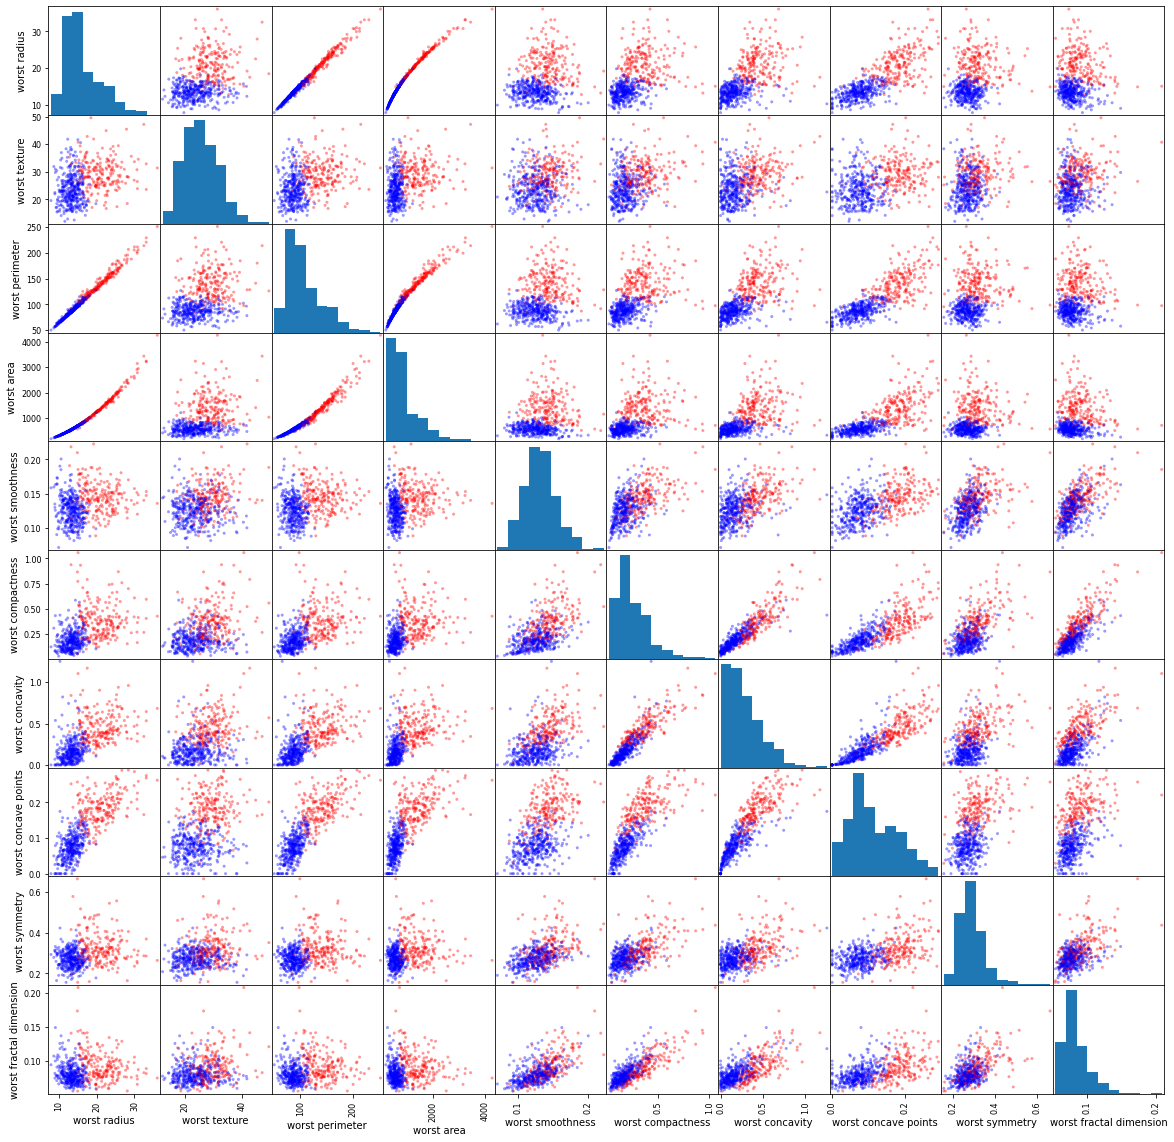

In [13]:
# make scatter plots of features to find good features
# adapted from: https://www.kaggle.com/rcfreitas/python-ml-breast-cancer-diagnostic-data-set

# 'mean' features are in the first 10 columns, error 10:20, worst 20:31
features_mean= list(X.columns[20:31])

# colors = ['red' if yy < 0 else 'blue' for yy in y.values.ravel()]
sm = pd.plotting.scatter_matrix(X[features_mean], c=colors, alpha=0.4, figsize=((20,20)));
plt.show()

Not surpringly, we see that radius, perimeter, and area are all stronly correlated, so let's choose just area for the first parameter.  Looking across the area row, texture, and then fractial dimension look well-differentated parameters.

In [0]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import svm
import numpy as np


def fineTuningPoly(X_train, X_test, y_train, y_test, ds,Cs):

  for C in Cs:
    for d in ds:
  
      clf = svm.SVC(kernel='poly', degree=d, gamma='auto', C=C)
      #clf = svm.SVC(kernel='linear', degree=d, gamma='auto', C=C)
      model = clf.fit(X_train, y_train.values.ravel()) 

      y_pred = model.predict(X_test)
      #print('d:',d, 'C:',round(C,2), round(mean_absolute_error(y_pred, y_test),5))
      print('d:',d, 'C:',round(C,2), round(accuracy_score(y_pred, y_test),5))


def fineTuningRBF(X_train, X_test, y_train, y_test, Cs):

  for C in Cs:
    clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
    model = clf.fit(X_train, y_train.values.ravel()) 

    y_pred = model.predict(X_test)
    #print( 'C:',round(C,2), round(mean_absolute_error(y_pred, y_test),5))
    print('C:',round(C,2), round(accuracy_score(y_pred, y_test),5))

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
features=['worst perimeter', 'worst texture', #'mean area', 'mean smoothness','mean compactness', 'mean concavity',
 #'mean concave points', 'mean symmetry', 
 #'mean fractal dimension'
 ]
X_train, X_test, y_train, y_test = train_test_split(X[features], y, 
                                                    test_size=0.8)

#X_train

In [0]:
ds = list(range(2,7))
Cs = [0.5,] #np.arange(0.2, 2, 0.2).tolist()

fineTuningPoly(X_train, X_test, y_train, y_test, ds, Cs)

d: 2 C: 0.5 0.94079
d: 3 C: 0.5 0.92544


Cost = 0.4 or 0.6 looks good!  Degree doesn't seem to matter.  Why?

In [52]:
fineTuningRBF(X_train, X_test, y_train, y_test, Cs)

C: 0.2 0.6
C: 0.4 0.61053
C: 0.6 0.62456
C: 0.8 0.61053
C: 1.0 0.62105
C: 1.2 0.62105
C: 1.4 0.62105
C: 1.6 0.62105
C: 1.8 0.62105


In [0]:
import numpy as np

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min()*0.9, x.max()*1.1
    y_min, y_max = y.min()*0.9, y.max()*1.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out



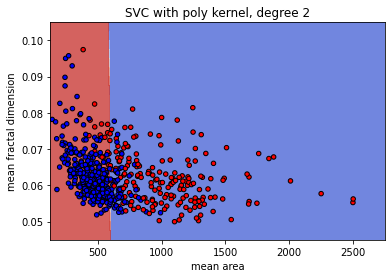

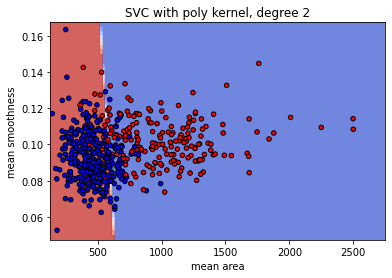

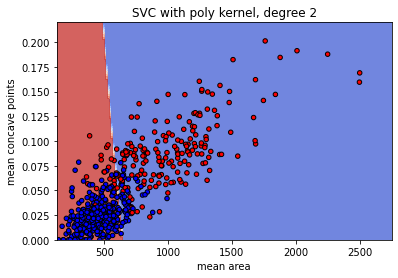

In [10]:
from sklearn import svm

degree = 2
kernel = 'poly'
clf = svm.SVC(kernel=kernel, degree=degree, gamma='auto', C=1.6, class_weight='balanced')

colors = ['red' if yy < 0 else 'blue' for yy in y.values.ravel()]
for features in [['mean area', 'mean fractal dimension'], 
                 ['mean area', 'mean smoothness'],
                 ['mean area', 'mean concave points']]:
  model = clf.fit(X_train[features], y_train.values.ravel()) 

  X0, X1 = X[features[0]], X[features[1]]
  xx, yy = make_meshgrid(X0, X1)

  plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
  plt.scatter(X0.values.ravel(), X1.values.ravel(), c=colors, 
            cmap=plt.cm.coolwarm, s=20, edgecolors='k')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xlabel(features[0])
  plt.ylabel(features[1])
  plt.title('SVC with %s kernel, degree %d' % (kernel, degree))
  plt.show()

# 5. 

NN Question:

Use `sklearn` MLP along with grid search to find an optimal prediction accuracy on the African Soil data from chapter 5. What do you think is the effect of having **p > n**, and why might NN be more or less appropriate than SVM or polynomials for this dataset?

In [0]:
# import drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 6. 

(Extra Credit) CNN Question:

Design a CNN in **Keras** with 3 convolutional layers to predict the fashion prodcut class from **Fashion-MNIST** (as loaded below). Use the `history` object of the return to Keras's `.fit()` function to plot and analyze the training `[acc]` and validation accuracy `[val_acc]` for each of the 15 epochs. Use 20/80 train/validation split. Hint: You can add the validation data as `validation_data` in the `.fit()` function.

In [0]:
from keras.datasets import fashion_mnist